In [1]:
# afegim llibreries necessaries
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns

# visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# llegim les dades del csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 
dataset = load_dataset('forestfires.csv')
data = dataset.values

In [2]:
print("Visualitzem les primeres 5 mostres de la BBDD:")
dataset.head() 

Visualitzem les primeres 5 mostres de la BBDD:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,oct,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,oct,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,mar,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,mar,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [8]:
# comprovar tipus de dades
dataset.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [4]:
# convertir dades a tipus numèric
#dataset = dataset.apply(pd.to_numeric, errors= 'coerce')
#dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,NaN,NaN,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,NaN,NaN,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,NaN,NaN,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,NaN,NaN,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,NaN,NaN,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [2]:
i = 0
while i < 517:
    if dataset['month'][i] == 'jan':
        dataset['month'][i] = 1
    elif dataset['month'][i] == 'feb':
        dataset['month'][i] = 2
    elif dataset['month'][i] == 'mar':
        dataset['month'][i] = 3
    elif dataset['month'][i] == 'apr':
        dataset['month'][i] = 4
    elif dataset['month'][i] == 'may':
        dataset['month'][i] = 5
    elif dataset['month'][i] == 'jun':
        dataset['month'][i] = 6
    elif dataset['month'][i] == 'jul':
        dataset['month'][i] = 7
    elif dataset['month'][i] == 'aug':
        dataset['month'][i] = 8
    elif dataset['month'][i] == 'sep':
        dataset['month'][i] = 9
    elif dataset['month'][i] == 'oct':
        dataset['month'][i] = 10
    elif dataset['month'][i] == 'nov':
        dataset['month'][i] = 11
    elif dataset['month'][i] == 'dec':
        dataset['month'][i] = 12
    i += 1

dataset.head()

/tmp/ipykernel_4601/1819461582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'][i] = 3
/tmp/ipykernel_4601/1819461582.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'][i] = 10
/tmp/ipykernel_4601/1819461582.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'][i] = 8
/tmp/ipykernel_4601/1819461582.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,10,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,10,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,3,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,3,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [3]:
i = 0
while i < 517:
    if dataset['day'][i] == 'mon':
        dataset['day'][i] = 1
    elif dataset['day'][i] == 'tue':
        dataset['day'][i] = 2
    elif dataset['day'][i] == 'wed':
        dataset['day'][i] = 3
    elif dataset['day'][i] == 'thu':
        dataset['day'][i] = 4
    elif dataset['day'][i] == 'fri':
        dataset['day'][i] = 5
    elif dataset['day'][i] == 'sat':
        dataset['day'][i] = 6
    elif dataset['day'][i] == 'sun':
        dataset['day'][i] = 7
    i += 1
    
    
dataset["day"] = pd.to_numeric(dataset["day"])
dataset.head()

/tmp/ipykernel_4601/2035355516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['day'][i] = 5
/tmp/ipykernel_4601/2035355516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['day'][i] = 2
/tmp/ipykernel_4601/2035355516.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['day'][i] = 6
/tmp/ipykernel_4601/2035355516.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [4]:
# canvi de object a int64 dels atributs any i dia per poder treballar comodament
dataset["day"] = pd.to_numeric(dataset["day"])
dataset["month"] = pd.to_numeric(dataset["month"])
dataset.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [6]:
# comptem els valors no existents
noExist = dataset.isnull().sum()
print(noExist)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [5]:
def f_area(a):
    if a == 0.0:
        return 0
    else:
        return 1

dataset['damage'] = dataset['area'].apply(f_area)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000,0
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000,0
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000,0
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000,0
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000,0


In [6]:
#damage_category
def f_area_damage(a):
    if a == 0:
        return 0
    elif a < 1: 
        return 1
    elif a < 50:
        return 2
    elif a < 100:
        return 3
    else:
        return 4
    
dataset['damage_category'] = dataset['area'].apply(f_area_damage)
dataset.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000,0,0
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000,0,0
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000,0,0
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000,0,0
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000,0,0


In [9]:
# anàlisis estadístic
dataset.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
count,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000
mean,4.669,4.300,7.476,4.259,90.645,110.872,547.940,9.022,18.889,44.288,4.018,0.022,12.847,0.522,1.060
std,2.314,1.230,2.276,2.073,5.520,64.046,248.066,4.559,5.807,16.317,1.792,0.296,63.656,0.500,1.092
min,1.000,2.000,1.000,1.000,18.700,1.100,7.900,0.000,2.200,15.000,0.400,0.000,0.000,0.000,0.000
25%,3.000,4.000,7.000,2.000,90.200,68.600,437.700,6.500,15.500,33.000,2.700,0.000,0.000,0.000,0.000
50%,4.000,4.000,8.000,5.000,91.600,108.300,664.200,8.400,19.300,42.000,4.000,0.000,0.520,1.000,1.000
75%,7.000,5.000,9.000,6.000,92.900,142.400,713.900,10.800,22.800,53.000,4.900,0.000,6.570,1.000,2.000
max,9.000,9.000,12.000,7.000,96.200,291.300,860.600,56.100,33.300,100.000,9.400,6.400,1090.840,1.000,4.000


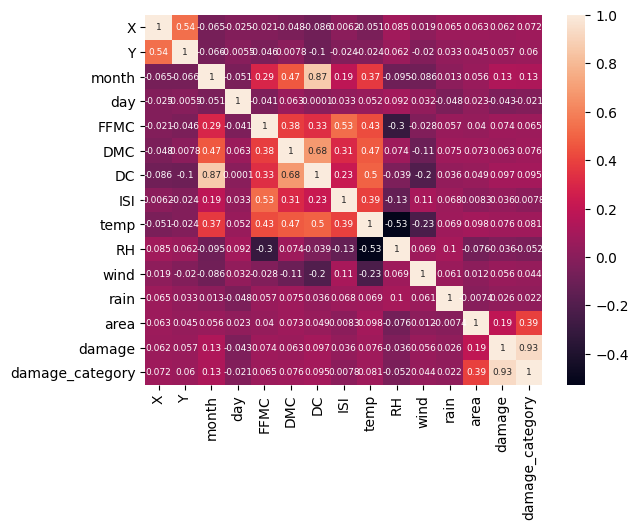

In [11]:
# mirem la correlació entre els atributs 
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 6.5})

In [17]:
data = dataset[dataset.damage == 1]
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
138,9,9,7,2,85.800,48.300,313.400,3.900,18.000,42,2.700,0.000,0.360,1,1
139,1,4,9,2,91.000,129.500,692.600,7.000,21.700,38,2.200,0.000,0.430,1,1
140,2,5,9,1,90.900,126.500,686.500,7.000,21.900,39,1.800,0.000,0.470,1,1
141,1,2,8,3,95.500,99.900,513.300,13.200,23.300,31,4.500,0.000,0.550,1,1
142,8,6,8,5,90.100,108.000,529.800,12.500,21.200,51,8.900,0.000,0.610,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,8,5,91.000,166.900,752.600,7.100,21.100,71,7.600,1.400,2.170,1,2
510,6,5,8,5,91.000,166.900,752.600,7.100,18.200,62,5.400,0.000,0.430,1,1
512,4,3,8,7,81.600,56.700,665.600,1.900,27.800,32,2.700,0.000,6.440,1,2
513,2,4,8,7,81.600,56.700,665.600,1.900,21.900,71,5.800,0.000,54.290,1,3


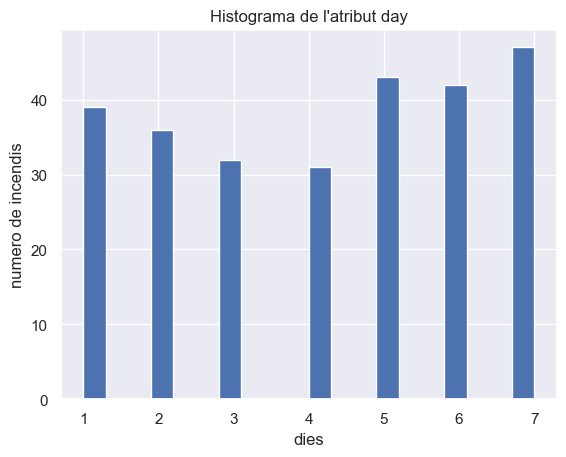

In [25]:
dataIncendis = dataset[dataset.damage == 1]
days = dataIncendis['day']
plt.figure()
plt.title("Histograma de l'atribut day")
plt.xlabel("dies")
plt.ylabel("numero de incendis")
hist = plt.hist(days,20)

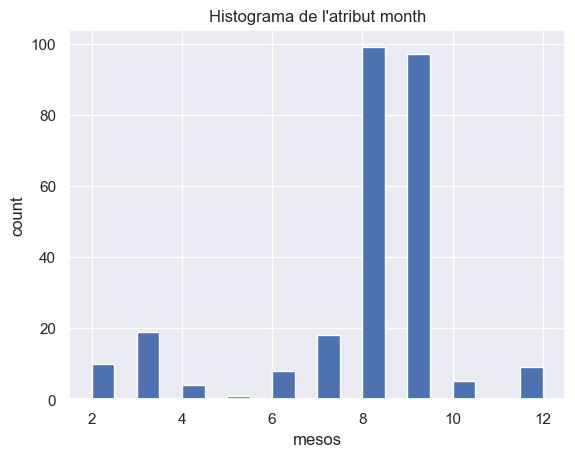

In [24]:
month = dataIncendis['month']
plt.figure()
plt.title("Histograma de l'atribut month")
plt.xlabel("mesos")
plt.ylabel("count")
hist = plt.hist(month,20)

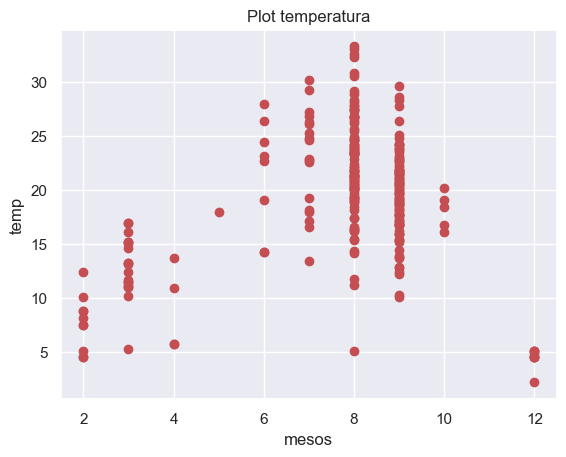

In [23]:
temp = dataIncendis["temp"]
month = dataIncendis["month"]

plt.figure()
plt.title("Plot temperatura")

plt.xlabel("mesos")
plt.ylabel("temp")

plt.plot(month,temp, 'ro')
plt.show()

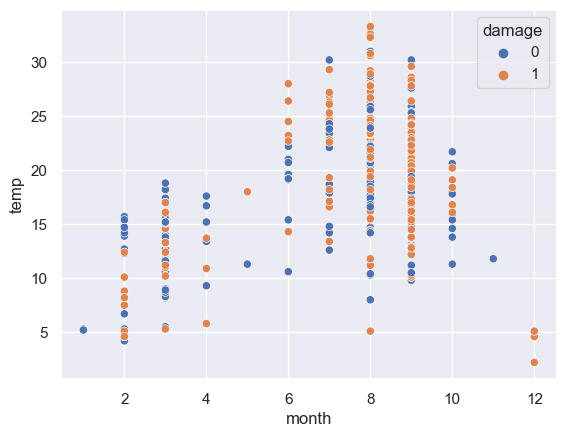

In [22]:
sns.set_theme()
sns.scatterplot(data=dataset, x='month', y='temp', hue='damage')
plt.show()

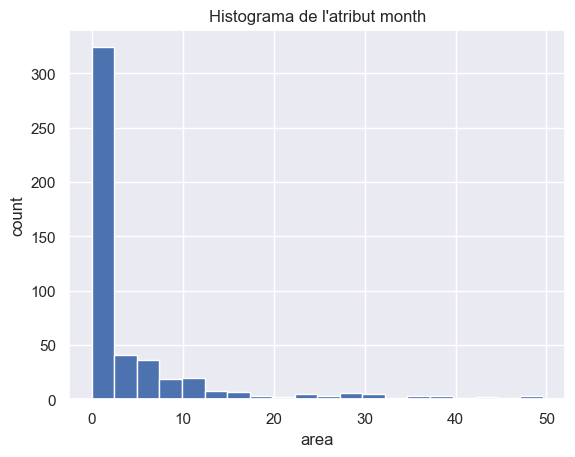

In [26]:
dataArea = dataset[dataset.area  < 50]
a = dataArea['area']

plt.figure()
plt.title("Histograma de l'atribut month")
plt.xlabel("area")
plt.ylabel("count")
hist = plt.hist(a,20)

<Figure size 640x480 with 0 Axes>

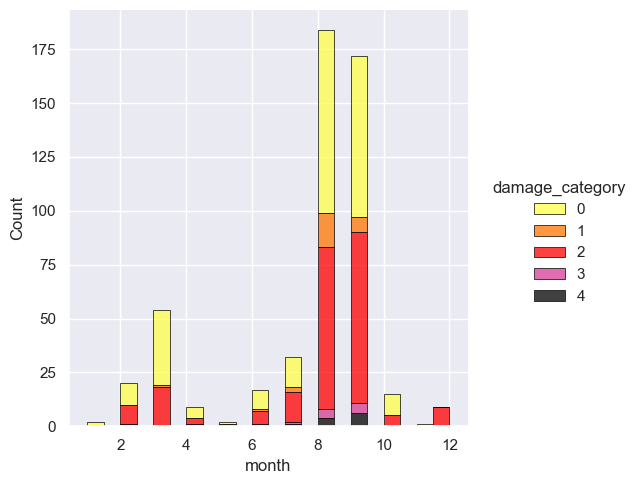

In [27]:
plt.figure()
p = ["#FFFF48", "#FF7600", "#FF0000", "#D43D94", "#000000"]
sns.displot(dataset, x='month', hue='damage_category',binwidth=0.5,multiple="stack", palette=p, edgecolor='black', 
linewidth=0.5)
plt.show()

In [34]:
dataIncendi0 = dataset[dataset.damage_category == 0]
dataIncendi1 = dataset[dataset.damage_category == 1]
dataIncendi2 = dataset[dataset.damage_category == 2]
dataIncendi3 = dataset[dataset.damage_category == 3]
dataIncendi4 = dataset[dataset.damage_category == 4]
#dataIncendi0.describe()
#dataIncendi1.describe()
dataIncendi2.describe()
#dataIncendi3.describe()
#dataIncendi4.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
count,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000,219.000
mean,4.790,4.370,7.726,4.155,90.974,113.137,567.885,9.128,18.801,44.210,4.147,0.036,10.344,1.000,2.000
std,2.295,1.090,2.242,2.053,3.883,63.324,239.335,4.236,6.452,15.639,1.917,0.442,11.109,0.000,0.000
min,1.000,2.000,2.000,1.000,63.500,3.200,15.300,0.800,2.200,15.000,0.400,0.000,1.010,1.000,2.000
25%,3.000,4.000,8.000,2.000,90.300,81.900,462.550,6.750,15.400,33.000,2.700,0.000,2.665,1.000,2.000
50%,5.000,4.000,8.000,4.000,91.600,111.200,664.500,8.400,19.600,41.000,4.000,0.000,6.430,1.000,2.000
75%,7.000,5.000,9.000,6.000,92.900,139.400,727.750,11.050,23.200,54.000,4.900,0.000,11.815,1.000,2.000
max,9.000,9.000,12.000,7.000,96.200,291.300,860.600,21.300,33.300,96.000,9.400,6.400,49.590,1.000,2.000


<Figure size 640x480 with 0 Axes>

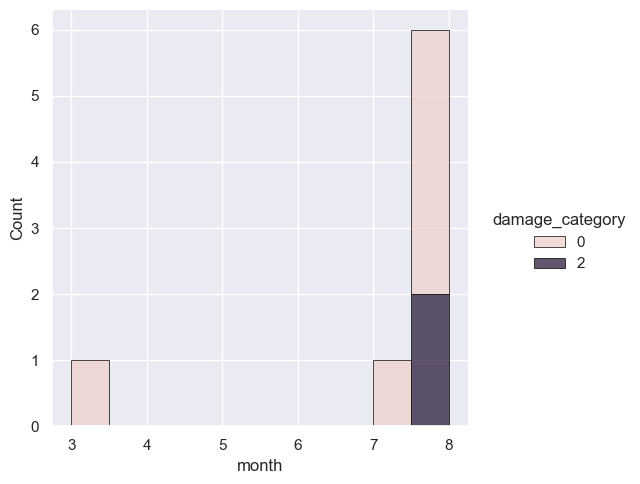

In [30]:
dataRain = dataset[dataset.rain > 0]
plt.figure()
#p = ["#FFFF48", "#FF7600", "#FF0000", "#D43D94", "#000000"]
sns.displot(dataRain, x='month', hue='damage_category',binwidth=0.5,multiple="stack", edgecolor='black', 
linewidth=0.5)
plt.show()

In [31]:
dataIncendis2Rain = dataRain[dataRain.damage_category == 2]
dataIncendis2Rain

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
499,7,5,8,2,96.100,181.100,671.200,14.300,27.300,63,4.900,6.400,10.820,1,2
509,5,4,8,5,91.000,166.900,752.600,7.100,21.100,71,7.600,1.400,2.170,1,2


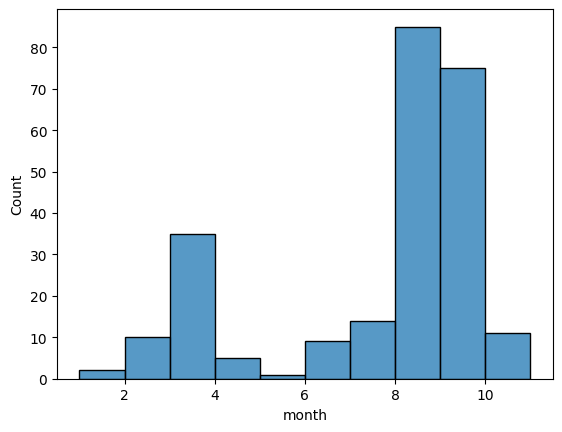

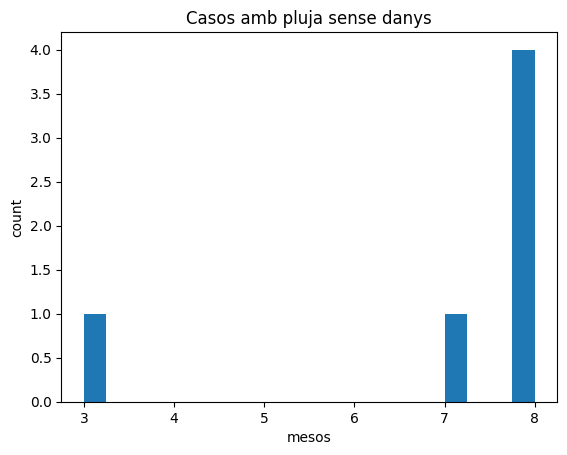

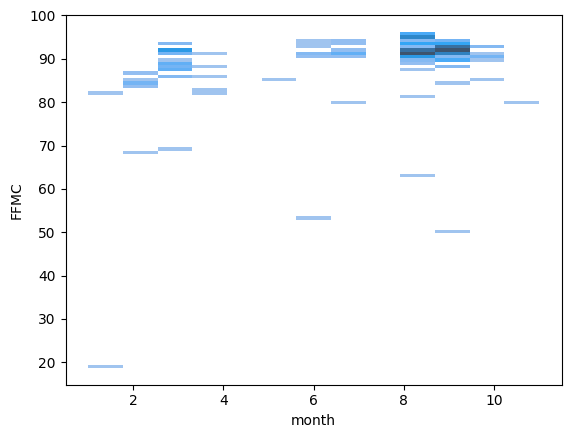

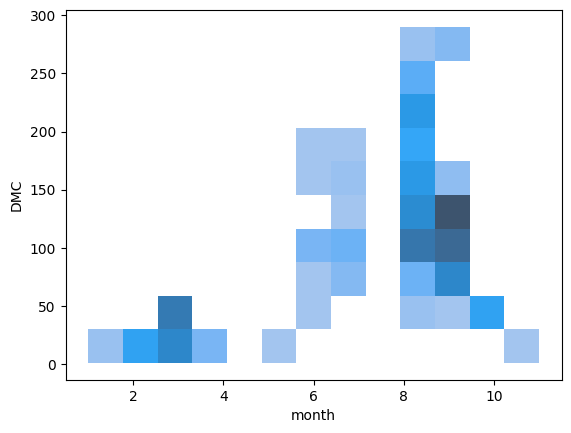

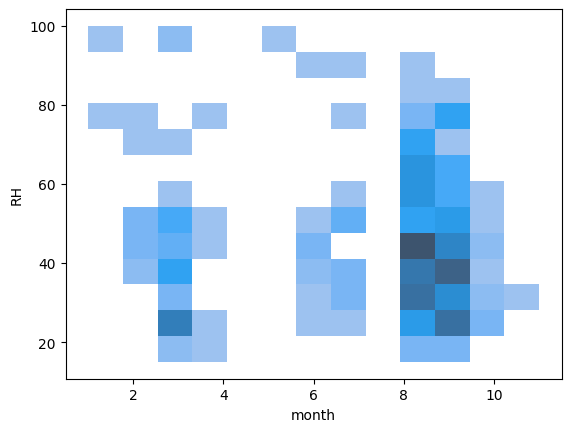

In [33]:
dataIncendisNoDamage = dataset[dataset.damage == 0]
pluja = dataIncendisNoDamage[dataIncendisNoDamage.rain > 0]
dataIncendisNoDamageH = dataIncendisNoDamage[["month","FFMC","DMC","RH"]]

#incendis sense danys
sns.histplot(data=dataIncendisNoDamage, x="month", binwidth=1)
plt.show()

#incendis amb pluja sense danys
plt.figure()
plt.title("Casos amb pluja sense danys")
plt.ylabel("count")
plt.xlabel("mesos")
hist = plt.hist(pluja['month'],20)
plt.show()

#FFMC
sns.histplot(data=dataIncendisNoDamageH, x="month", y="FFMC", stat='count')
plt.show()
#DMC
sns.histplot(data=dataIncendisNoDamageH, x="month", y="DMC", stat='count')
plt.show()
#RH
sns.histplot(data=dataIncendisNoDamageH, x="month", y="RH", stat='count')
plt.show()


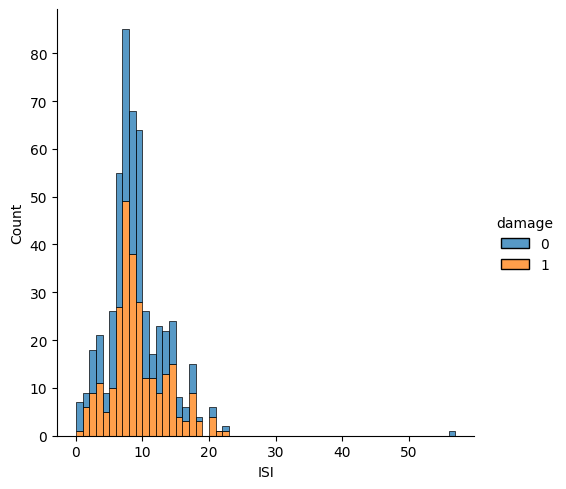

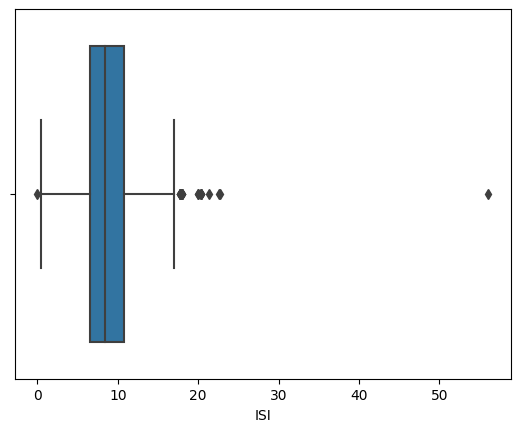

In [39]:
sns.displot(dataset, x='ISI', hue='damage', binwidth=1, multiple="stack")
plt.show()
sns.boxplot(x=dataset["ISI"])
plt.show()

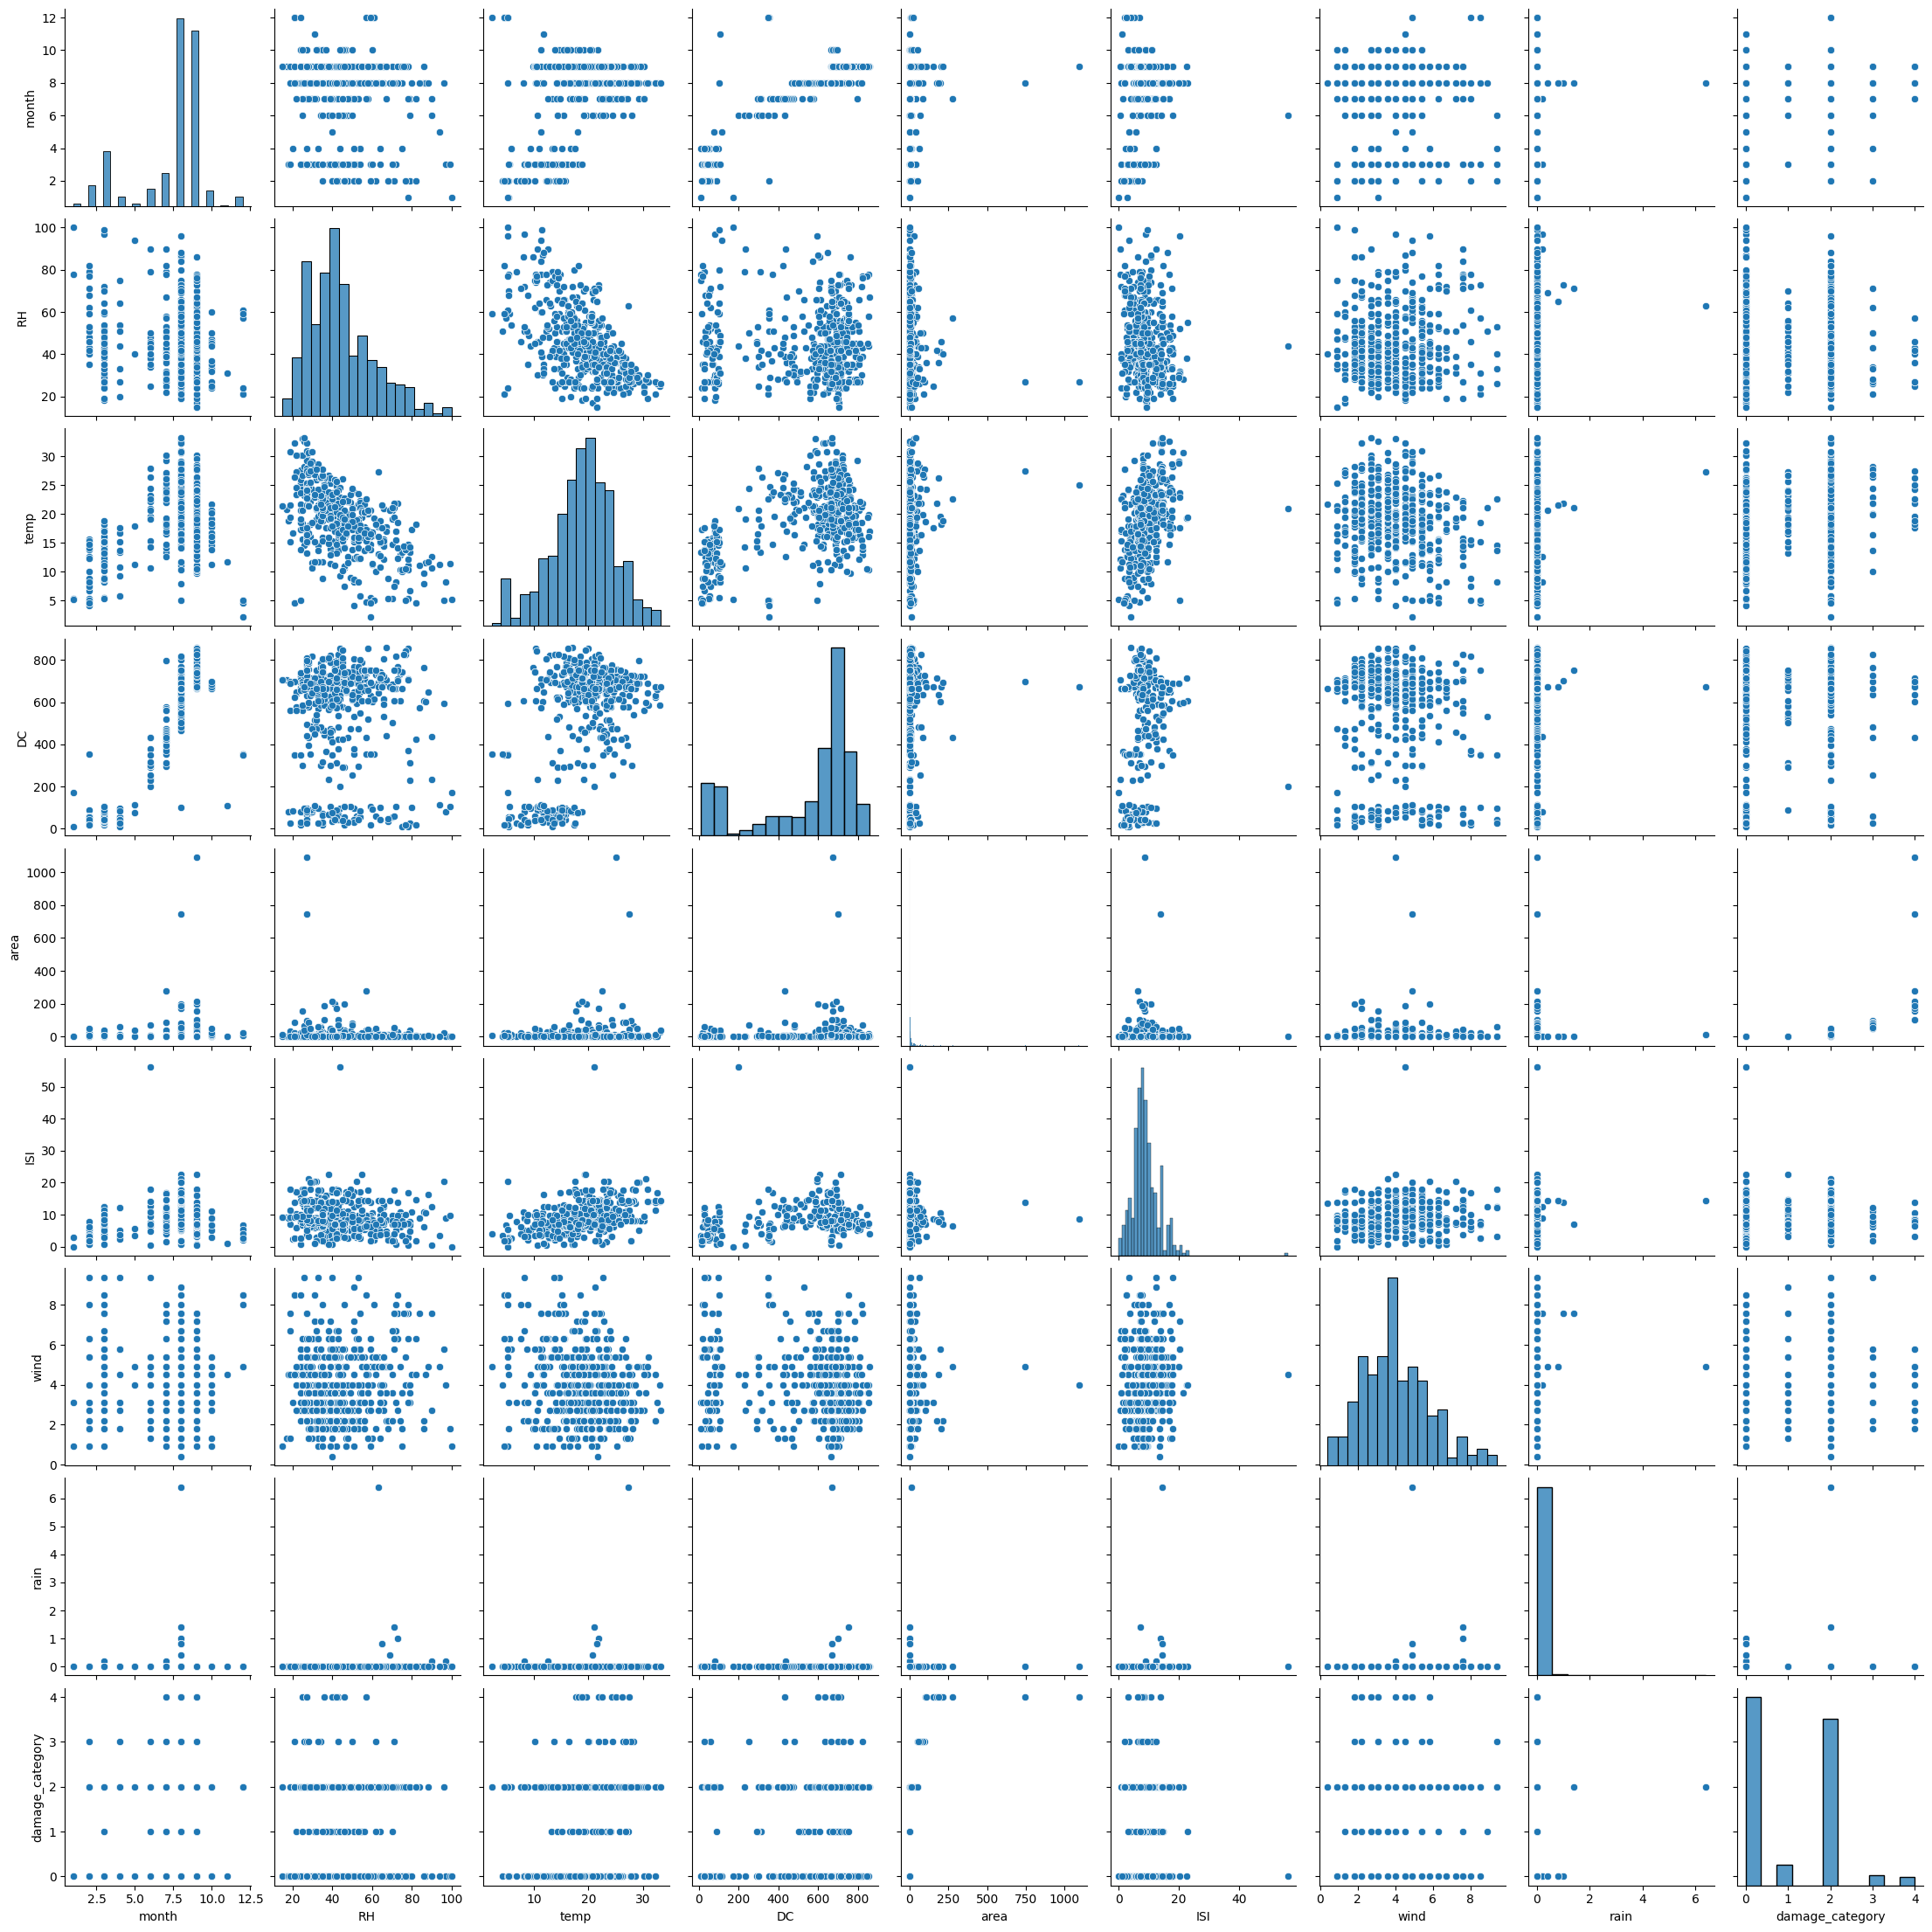

In [20]:
sns.pairplot(dataset[['month','RH','temp','DC','area','ISI','wind','rain', 'damage_category']])
plt.show()

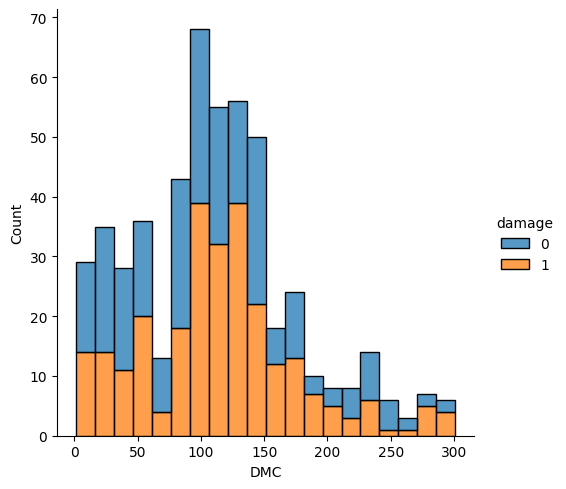

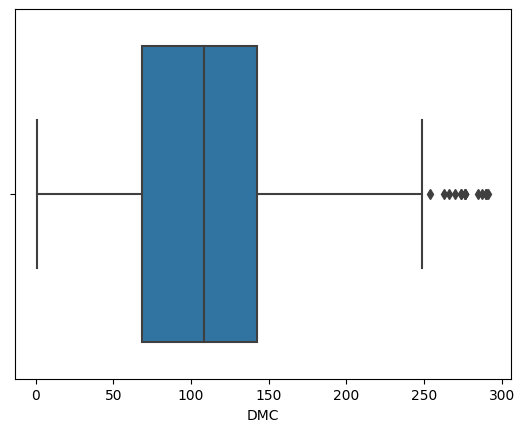

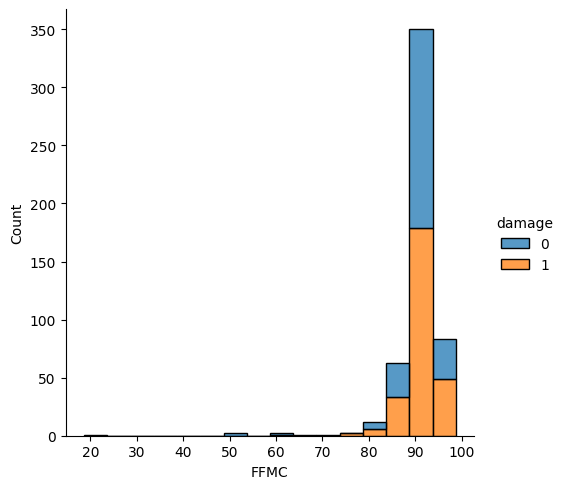

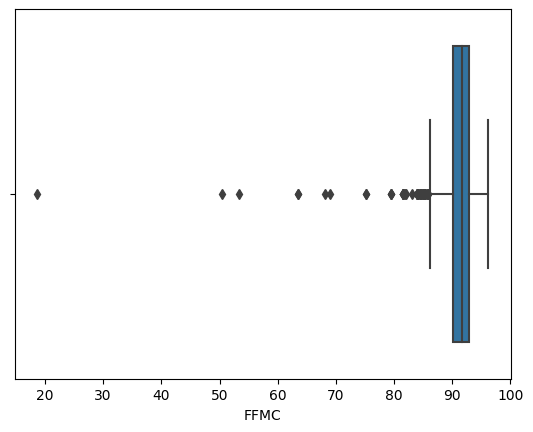

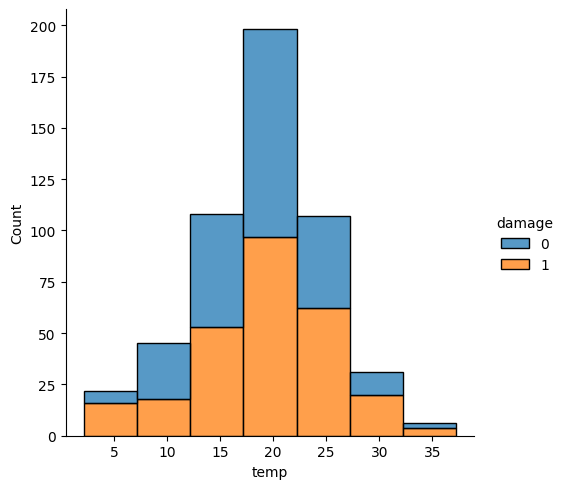

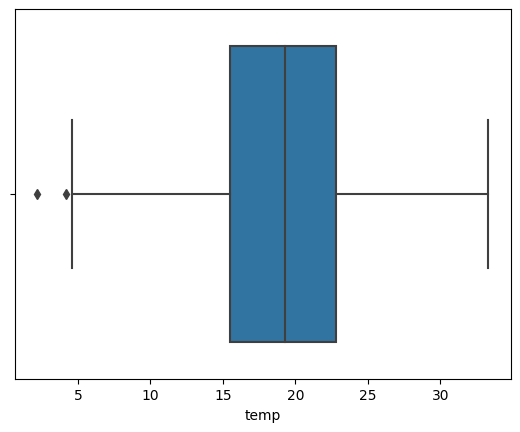

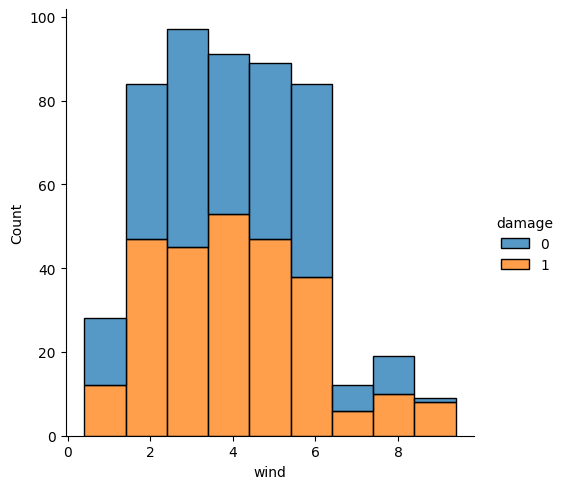

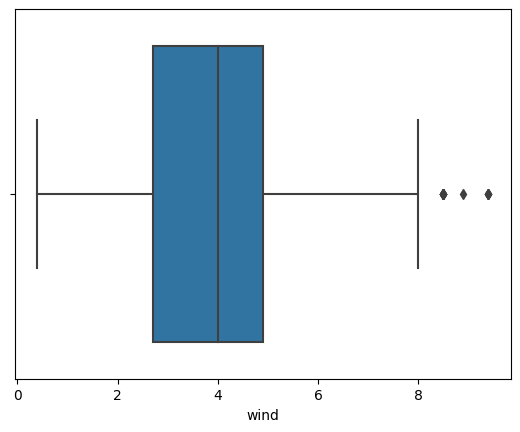

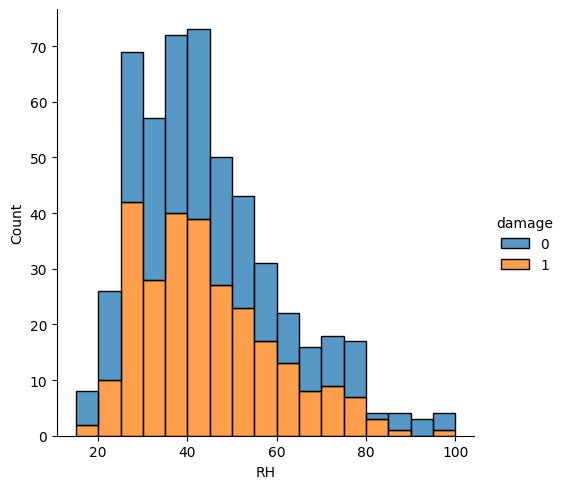

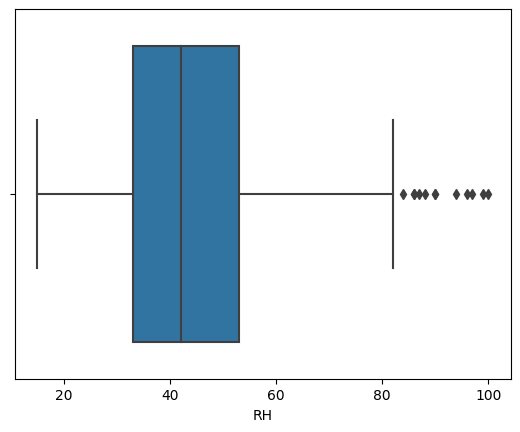

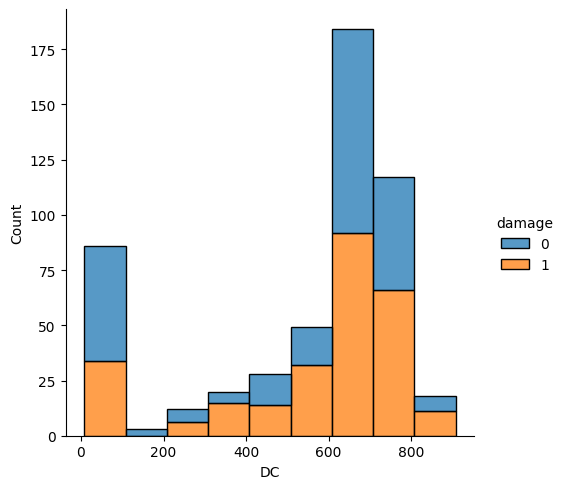

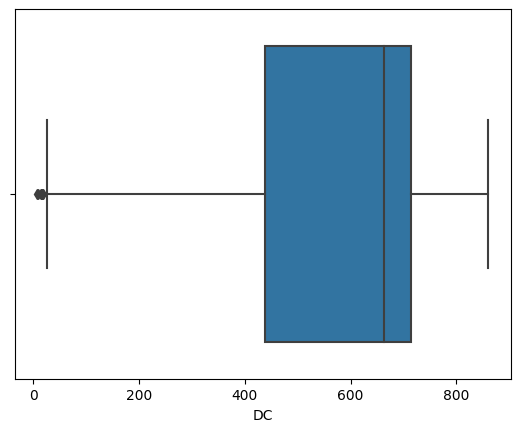

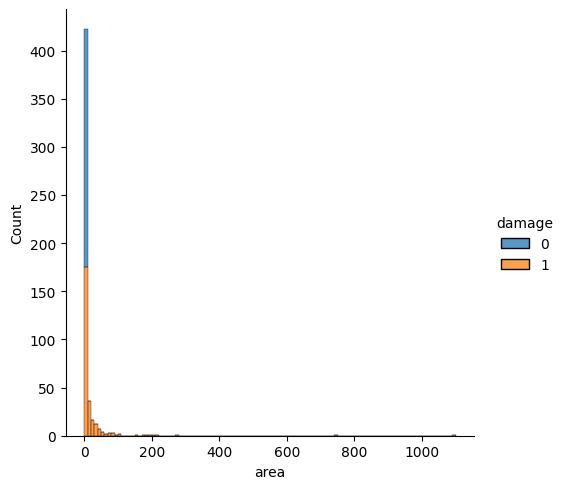

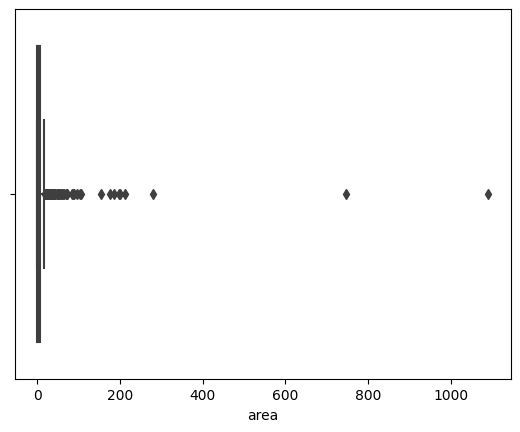

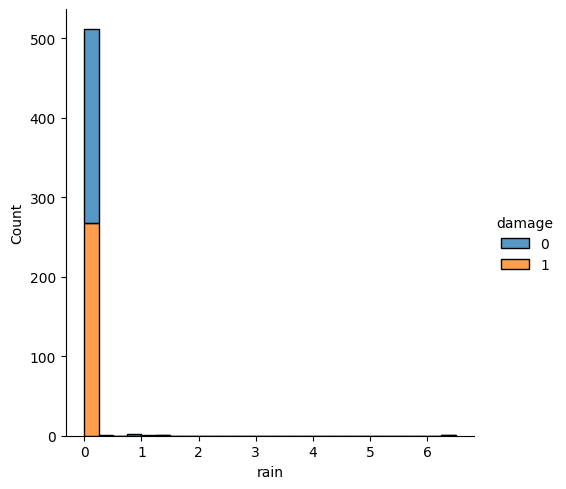

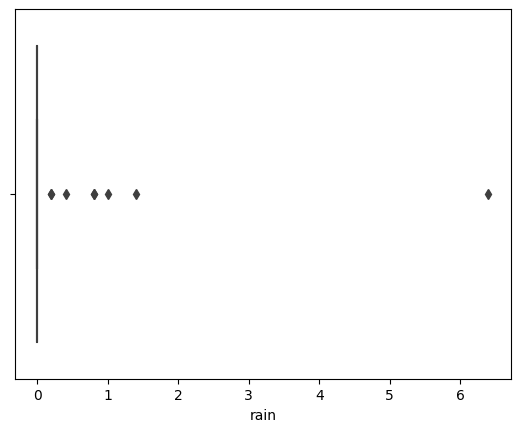

In [23]:
#mirem distribució normal dels atributs
sns.displot(dataset, x='DMC', hue='damage', binwidth=15, multiple="stack")
plt.show()

sns.boxplot(x=dataset["DMC"])
plt.show()

sns.displot(dataset, x='FFMC', hue='damage', binwidth=5, multiple="stack")
plt.show()

sns.boxplot(x=dataset["FFMC"])
plt.show()

sns.displot(dataset, x='temp', hue='damage', binwidth=5, multiple="stack")
plt.show()

sns.boxplot(x=dataset["temp"])
plt.show()

sns.displot(dataset, x='wind', hue='damage', binwidth=1, multiple="stack")
plt.show()

sns.boxplot(x=dataset["wind"])
plt.show()

sns.displot(dataset, x='RH', hue='damage', binwidth=5, multiple="stack")
plt.show()
sns.boxplot(x=dataset["RH"])
plt.show()

sns.displot(dataset, x='DC', hue='damage', binwidth=100, multiple="stack")
plt.show()
sns.boxplot(x=dataset["DC"])
plt.show()

sns.displot(dataset, x='area', hue='damage', binwidth=10, multiple="stack")
plt.show()
sns.boxplot(x=dataset["area"])
plt.show()

sns.displot(dataset, x='rain', hue='damage', binwidth=0.25, multiple="stack")
plt.show()
sns.boxplot(x=dataset["rain"])
plt.show()

In [7]:
import math
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.warnings.filterwarnings('ignore')

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()
    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)
    # Retornem el model entrenat
    return regr

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

Error en atribut 0: 9.860753
R2 score en atribut 0: 0.452430
Error en atribut 1: 14.567071
R2 score en atribut 1: 0.191087
Error en atribut 2: 16.333013
R2 score en atribut 2: 0.093024
Error en atribut 3: 13.511494
R2 score en atribut 3: 0.249704
Error en atribut 4: 18.671754
R2 score en atribut 4: -0.036847
Error en atribut 5: 17.905212
R2 score en atribut 5: 0.005720
Error en atribut 6: 18.701823
R2 score en atribut 6: -0.038516
Error en atribut 7: 18.273045
R2 score en atribut 7: -0.014706


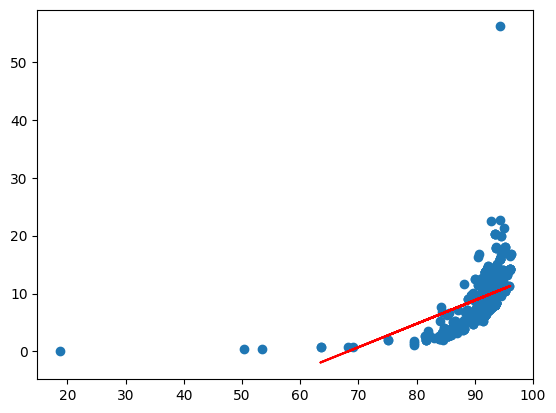

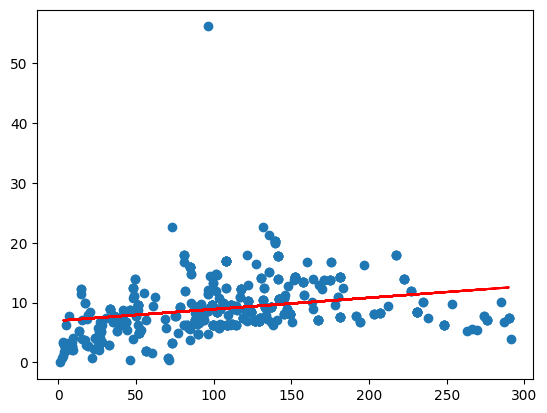

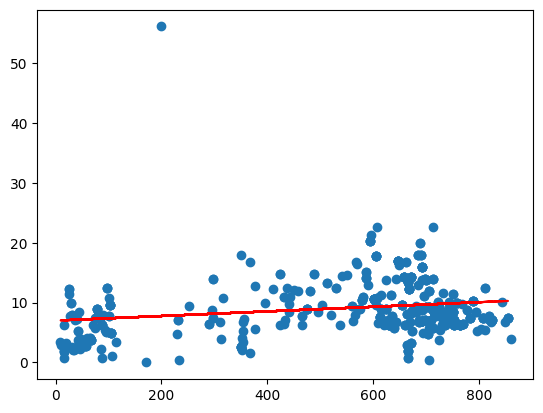

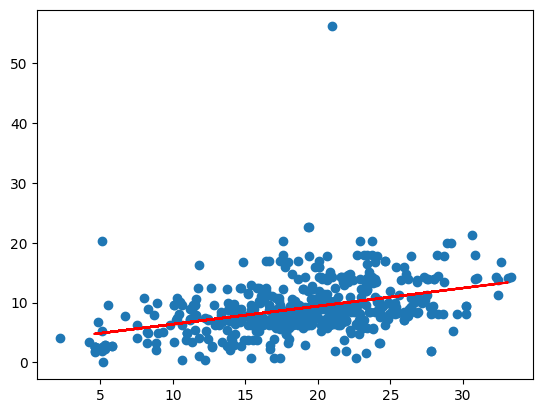

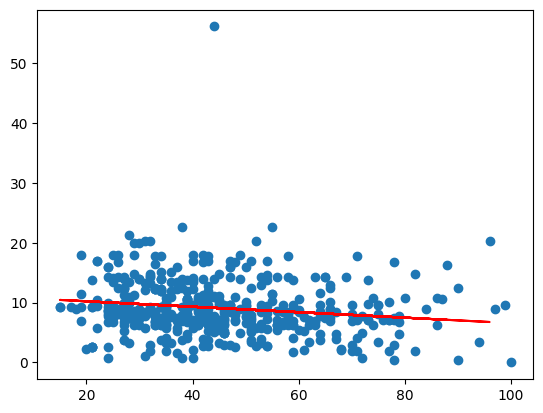

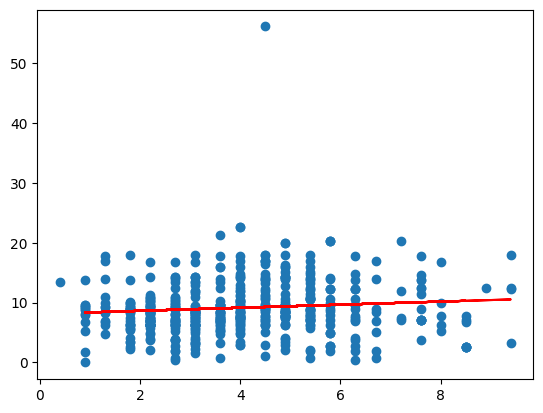

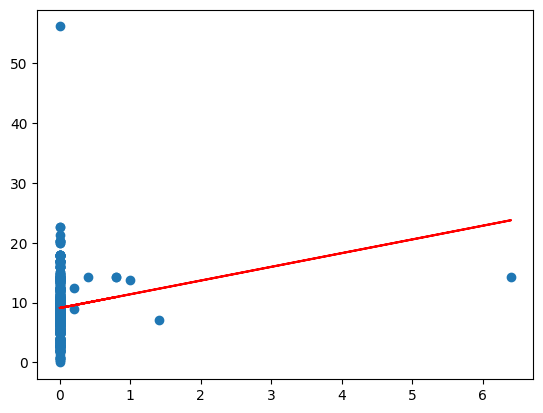

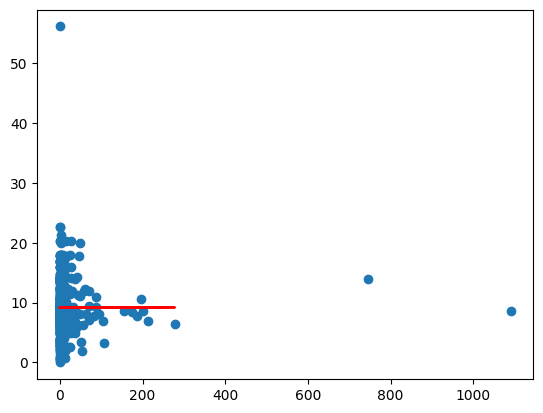

In [67]:
data = dataset.values
x = data[:,[4,5,6,8,9,10,11,12]] #FFMC, DMC, DC, temp, RH, wind, rain, area
y = data[:,7] #ISI 7

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.20, random_state=39) #39

for i in range(x_train.shape[1]):
    x_tr = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_te = x_test[:,i] # seleccionem atribut i en conjunt de test.
    x_tr = np.reshape(x_tr,(x_tr.shape[0],1))
    x_te = np.reshape(x_te,(x_te.shape[0],1))

    regr = regression(x_tr, y_train)
    predicted = regr.predict(x_te)
    error = mse(y_test, regr.predict(x_te)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_te))
    
    plt.figure()
    ax = plt.scatter(x[:,i], y)
    plt.plot(x_te, predicted, 'r')
    
    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

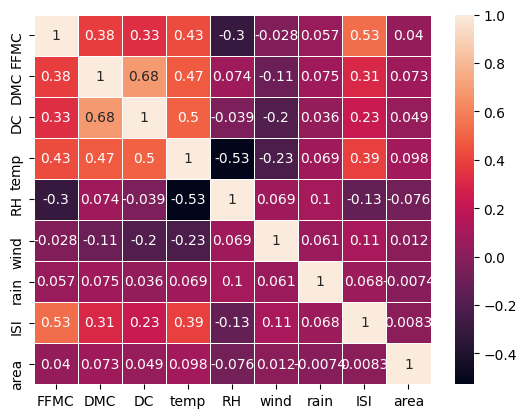

In [69]:
correlacio = dataset[['FFMC','DMC','DC','temp','RH','wind','rain','ISI','area']].corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [80]:
data = dataset.values
normal = []
for i in range(data.shape[1]):
    normal.append(standarize(data[:,[i]]))
normal_np = np.array(normal)
print(normal_np)

[[[ 1.00831277]
  [ 1.00831277]
  [ 1.00831277]
  ...
  [ 1.00831277]
  [-1.58736044]
  [ 0.57570057]]

 [[ 0.56986043]
  [-0.24400101]
  [-0.24400101]
  ...
  [-0.24400101]
  [-0.24400101]
  [-1.05786246]]

 [[-1.96844301]
  [ 1.1101202 ]
  [ 1.1101202 ]
  ...
  [ 0.23053071]
  [ 0.23053071]
  [ 1.54991494]]

 ...

 [[-0.20201979]
  [-0.20201979]
  [-0.20201979]
  ...
  [-0.02653216]
  [-0.20201979]
  [-0.20201979]]

 [[-1.04552255]
  [-1.04552255]
  [-1.04552255]
  ...
  [ 0.95645952]
  [-1.04552255]
  [-1.04552255]]

 [[-0.97173508]
  [-0.97173508]
  [-0.97173508]
  ...
  [ 0.86179425]
  [-0.97173508]
  [-0.97173508]]]


[1, 2]
